<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Fake_News_Detection_PH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection PH
Dataset: https://huggingface.co/datasets/fake_news_filipino

Task: text-classification NLP

Contains 3,206 expertly-labeled news samples, half of which are real and half of which are fake.

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

# Data Exploration

In [3]:
df = pd.read_csv('fakenews_data_ph.csv')

In [4]:
df.head()

,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


In [5]:
df.tail()

,label,article
3201,1,Hindi pa nai-enjoy ni Giacomo Filibeck ang Pil...
3202,1,"Sa isang pahayag, binatikos ng Liberal Party (..."
3203,1,Panoorin nyo yung reaction video na ito ni Mr....
3204,1,Para sa mga magkakapatid na laging nagtatalo l...
3205,1,Grabe ibang klase talaga si Vice Ganda kung ma...


In [6]:
df.describe()

,label
count,3206.000000
mean,0.500000
std,0.500078
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


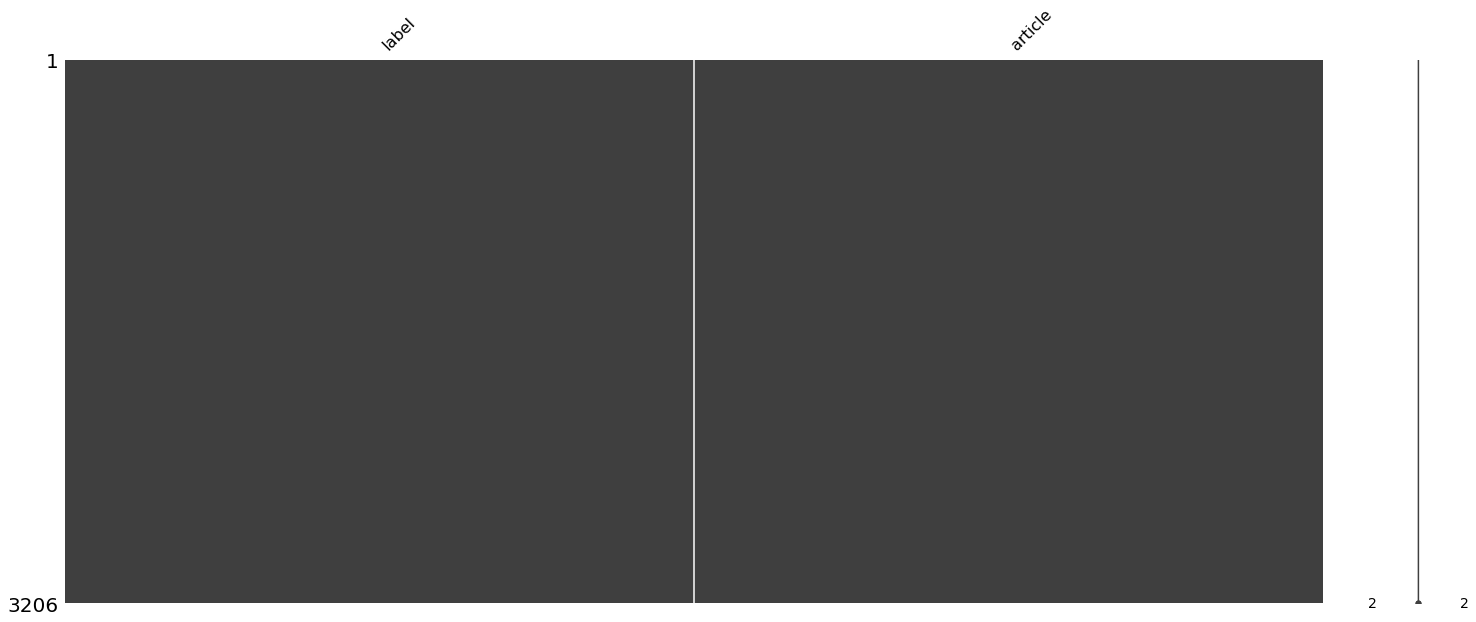

Missing: 0


In [7]:
missingno.matrix(df)
plt.show()
print("Missing: {}".format(df.isna().sum().sum()))

## Shuffling Dataset

In [8]:
from sklearn.utils import shuffle

df = shuffle(df).reset_index(drop=True)

In [9]:
df.head()

,label,article
0,0,MATAPOS masangkot sa Sony hacking scandal at n...
1,1,Marami ang nagbato ng batikos sa PBB at mismo ...
2,1,Sa patuloy na pamimigay ng Duterte Administrat...
3,1,Mukhang malilintikan ang nanay ni Senador Anto...
4,1,"Sa isang video, sinagot ni TV/Radio host Raffy..."


In [10]:
df.tail()

,label,article
3201,0,UMABOT sa 40 kandidato ang isinama ng Commissi...
3202,1,Sa kanyang mensahe sa harap ng mga kalahok sa ...
3203,0,"Sa pahayag ni Dra. Sicat sa pulisya, tinutukan..."
3204,1,Tatlong araw bago maghalalan ay ibinunyag ng C...
3205,1,Napakahirap maging biktima ng trahedya o aksid...


In [11]:
df.loc[3201, 'article'] # 0

'UMABOT sa 40 kandidato ang isinama ng Commission on Elections (Comelec) sa umano\'y sangkot sa illegal campaign posters. Isinapubliko ni Comelec Commissioner Rowena Guanzon sa tweet ang mga pangalan ng mga senadotrial bets. Kabilang sa mga umano\'y sangkot sa illegal campaign posters ay si Senator Aquilino "Koko" Pimentel, presidente ng PDP-Laban at kabilang sa 11 kandidato na inendorso ni Pangulong Duterte. "I have very few posters. Hence, most unlikely yan," sabi ni Pimentel. Sinabi naman ni Senator Nancy Binay na nagulat siya nang marinig ang balita. "Medyo nagulat din ako sa balita tungkol dun sa illegal posters daw. I\'m not sure where the reports are coming from, but as far as I\'m concerned, wala pa kaming tarps o kahit posters na inilalabas," sabi ni Binay. "I find it very offensive that I\'m being tagged as a violator sa mga campaign materials," ayon pa kay Binay. Kinuwestiyon din ni Binay kung bakit hindi nakasama sa listahan ang mga kandidato na kalat ang mukha sa buong ban

In [12]:
df.loc[3202, 'article'] # 1

'Sa kanyang mensahe sa harap ng mga kalahok sa Vatican conference on drug addiction, hinimok ng Pope Francis na sugpuin ang paggawa at pagpapaakalat ng iligal na droga. Ayon pa sa Santo Papa, kamatayan daw ang inilalako ng mga drug traffickers kaya tungkulin ng mga gobyerno na labanan ang mga drug traffickers. "It is the duty and responsibility of governments courageously to undertake this fight against those who deal in death," mensahe ni Peope Francis. Ang mga mensahe ni Pope Francis ay tila sumasalungat sa mga binulalas dati ni Activist Priest Father Robert Reyes noong Oktubre 2017. Nabapalita noon na sinabi ni Reyes na ang droga ay hindi krimen. Ang simbahang katoliko naman sa Pilipinas ay kontra din sa kampanya ng Duterte Administration laban sa iligal na droga. "You do not solve a health issue with police force. Ang droga, hindi crime. That\'s what you have to address first. He is sick and therefore, he needs medical attention," sabi dati ni Fr. Reyes. Ang naging pahayag ni Pope 

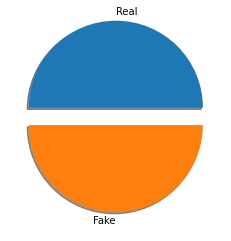

Real news count:  1603
Fake news count:  1603


In [13]:
# 1 == Fake and 0 == Real
real_news = len(df[df['label'] == 0])
fake_news = len(df[df['label'] == 1])
plt.pie([real_news, fake_news], labels=['Real', 'Fake'], explode = [0.2,0.0] , shadow=True)
plt.show()

print("Real news count: ", real_news)
print("Fake news count: ", fake_news)

# Data Preprocessing

## Converting text to lowercase

In [14]:
df['article'] = df['article'].apply(lambda txt: txt.lower())

In [15]:
df.head()

,label,article
0,0,matapos masangkot sa sony hacking scandal at n...
1,1,marami ang nagbato ng batikos sa pbb at mismo ...
2,1,sa patuloy na pamimigay ng duterte administrat...
3,1,mukhang malilintikan ang nanay ni senador anto...
4,1,"sa isang video, sinagot ni tv/radio host raffy..."


## Removing Punctuations

In [16]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuation(txt):
  all_list = [char for char in txt if char not in string.punctuation]
  return ''.join(all_list)

In [18]:
df['article'] = df['article'].apply(remove_punctuation)

In [19]:
df.head()

,label,article
0,0,matapos masangkot sa sony hacking scandal at n...
1,1,marami ang nagbato ng batikos sa pbb at mismo ...
2,1,sa patuloy na pamimigay ng duterte administrat...
3,1,mukhang malilintikan ang nanay ni senador anto...
4,1,sa isang video sinagot ni tvradio host raffy t...


## Removing stopwords

Stop words are the words in a stop list which are filtered out before or after processing of natural language data because they are insignificant. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.

### English Stopwords

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

df['article'] = df['article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,article
0,0,matapos masangkot sa sony hacking scandal nagi...
1,1,marami ang nagbato ng batikos sa pbb mismo kay...
2,1,sa patuloy na pamimigay ng duterte administrat...
3,1,mukhang malilintikan ang nanay ni senador anto...
4,1,sa isang video sinagot ni tvradio host raffy t...


### Tagalog Stopwords

In [21]:
tl_stopwords = []
with open('stopwords-tl.txt') as topo_file:
    for line in topo_file:
        tl_stopwords.append(line.replace('\n', ''))
tl_stopwords.extend(['ba', 'eh', 'kasi', 'lang', 'mo', 'naman', 'opo', 'po', 'si', 'talaga', 'yung'])

In [22]:
print(tl_stopwords)

['akin', 'aking', 'ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano', 'anumang', 'apat', 'at', 'atin', 'ating', 'ay', 'bababa', 'bago', 'bakit', 'bawat', 'bilang', 'dahil', 'dalawa', 'dapat', 'din', 'dito', 'doon', 'gagawin', 'gayunman', 'ginagawa', 'ginawa', 'ginawang', 'gumawa', 'gusto', 'habang', 'hanggang', 'hindi', 'huwag', 'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan', 'inyong', 'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyong', 'ka', 'kahit', 'kailangan', 'kailanman', 'kami', 'kanila', 'kanilang', 'kanino', 'kanya', 'kanyang', 'kapag', 'kapwa', 'karamihan', 'katiyakan', 'katulad', 'kaya', 'kaysa', 'ko', 'kong', 'kulang', 'kumuha', 'kung', 'laban', 'lahat', 'lamang', 'likod', 'lima', 'maaari', 'maaaring', 'maging', 'mahusay', 'makita', 'marami', 'marapat', 'masyado', 'may', 'mayroon', 'mga', 'minsan', 'mismo', 'mula', 'muli', 'na', 'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'namin', 'napaka', 'narito', 'nasaan', 'ng', 'ngayon', 'ni', 'nila',

In [23]:
df['article'] = df['article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (tl_stopwords)]))
df.head()

,label,article
0,0,matapos masangkot sony hacking scandal usapusa...
1,1,nagbato batikos pbb kay lou umano naginsist ka...
2,1,patuloy pamimigay duterte administration lupa ...
3,1,mukhang malilintikan nanay senador antonio tri...
4,1,video sinagot tvradio host raffy tulfo paratan...


## Visualizing Frequent Word Occurrency

In [24]:
from wordcloud import WordCloud

is_fake = df['label'] == 1
fake_data = df[is_fake]
real_data = df[~is_fake]

Fake News


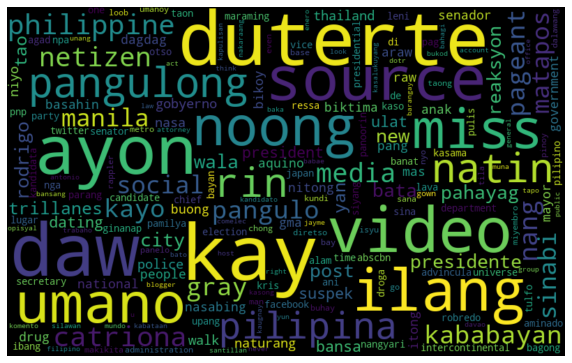

In [25]:
all_words = ' '.join([text for text in fake_data.article])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
print("Fake News")

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Real News


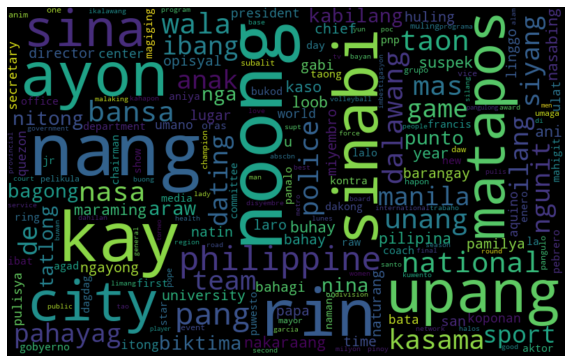

In [26]:
print("Real News")
all_words = ' '.join([text for text in real_data.article])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most frequent words counter

In [27]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
  all_words = ' '.join([text for text in text[column_text]])
  token_phrase = token_space.tokenize(all_words)
  frequency = nltk.FreqDist(token_phrase)
  df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                  "Frequency": list(frequency.values())})
  df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
  ax.set(ylabel = "Count")
  plt.xticks(rotation='vertical')
  plt.show()

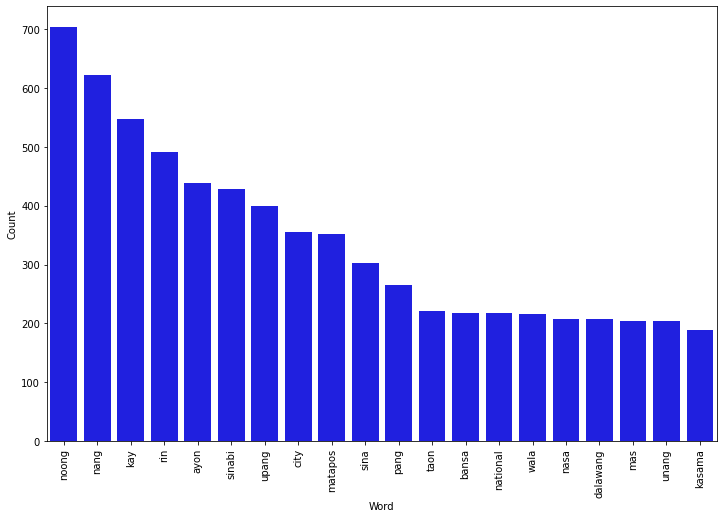

In [28]:
counter(df[df["label"] == 0], "article", 20)

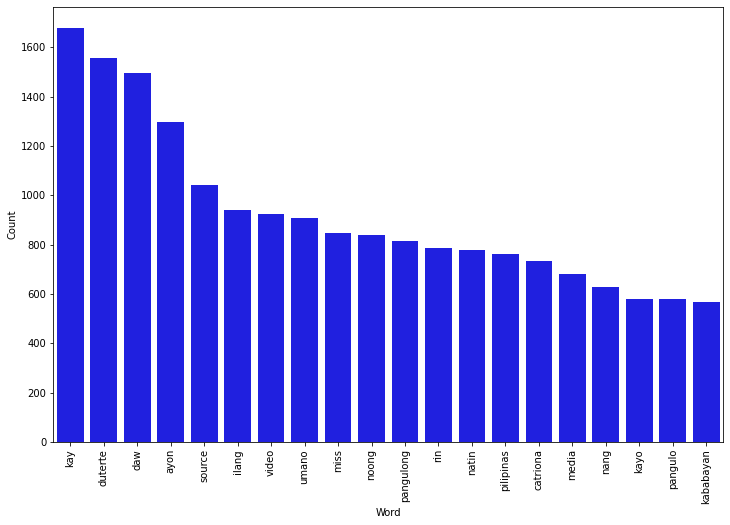

In [29]:
counter(df[df["label"] == 1], "article", 20)

# Model Development

## Splitting Data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['label'], test_size=0.2, random_state=42)

In [31]:
X_train.shape, y_train.shape

((2564,), (2564,))

In [32]:
X_test.shape, y_test.shape

((642,), (642,))

## Selecting Base Model

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': MultinomialNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

results = []
for name, model in models.items():
  pipeline = Pipeline([
                    ('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', model)
                    ])
  pipeline.fit(X_train, y_train)
  prediction = pipeline.predict(X_test)
  print("{} accuracy: {}%".format(name, round(accuracy_score(y_test, prediction)*100,2)))

DecisionTree accuracy: 91.9%
NaiveBayes accuracy: 90.81%
KNeighborsClassifier accuracy: 88.94%
RandomForestClassifier accuracy: 95.02%


## Hyperparameter Tuning

In [73]:
pipeline = Pipeline([
                    ('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', RandomForestClassifier())
                    ])
param_grid = { 
    'model__n_estimators': [200, 500],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : range(1,30),
    'model__criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(pipeline, param_grid, cv= 5)
# grid_search.get_params().keys()
grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [62]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.944
Best parameters set:
	model__criterion: 'entropy'
	model__max_depth: 28
	model__max_features: 'auto'
	model__n_estimators: 500


In [76]:
pipeline = Pipeline([
                    ('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', RandomForestClassifier())
                    ])

## Fitting the model

In [77]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier())])

## Predicting testing dataset

In [78]:
predictions = pipeline.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))

accuracy: 94.55%


In [79]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization


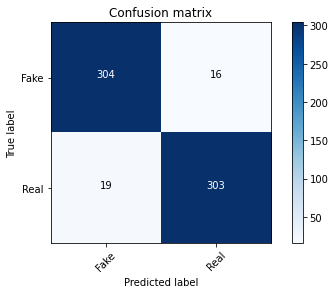

In [80]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])